# Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
`profits` and `populations` from the cities.

You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. 
- The first column is the population of a city 
- the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

[*] plotData.m - Function to display the dataset

[*] computeCost.m - Function to compute the cost of linear regression

[*] gradientDescent.m - Function to run gradient descent

In [2]:
# 读取txt中的数据到x,y中
import numpy as np

file = open('/content/ex1data1.txt', 'r')
file_data = file.readlines()

x_data = []
y_data = []
for row in file_data:
  tmp_list = row.split(',') # 以','分割数据
  tmp_list[-1] = tmp_list[-1].replace('\n', '') # 去掉换行符
  # 这里读出的是字符串，一定要转为数值型
  x_data.append(float(tmp_list[0]))
  y_data.append(float(tmp_list[1]))
# x_data, y_data

FileNotFoundError: ignored

# plotData

NameError: ignored

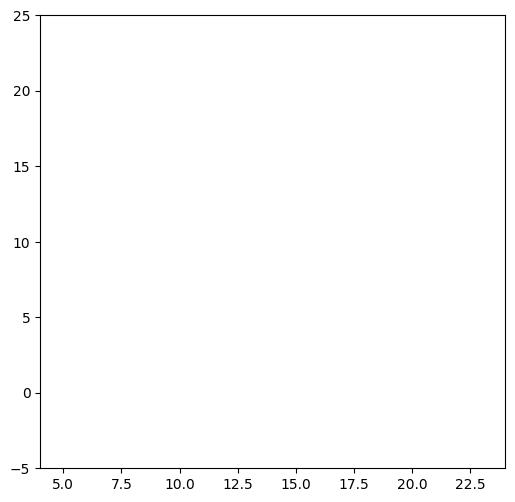

In [1]:
# 对数据绘图
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6),dpi=100)#设置画布
plt.xlim((4, 24))#设定x轴范围
plt.ylim((-5, 25))#设定y轴范围
plt.scatter(x_data, y_data, s=10, c='red', marker='x')
plt.xlabel('Popupation of City in 10,000s')#设定x轴注释
plt.ylabel('Profit in $10,000s')#设定y轴注释
plt.show()

# computeCost and gradientDescent

i: 1, error: 32.072734
i: 2, error: 6.737190
i: 3, error: 5.931594
i: 4, error: 5.901155
i: 5, error: 5.895229
i: 6, error: 5.890095
i: 7, error: 5.885004
i: 8, error: 5.879932
i: 9, error: 5.874879
i: 10, error: 5.869844
i: 11, error: 5.864827
i: 12, error: 5.859828
i: 13, error: 5.854847
i: 14, error: 5.849884
i: 15, error: 5.844939
i: 16, error: 5.840011
i: 17, error: 5.835102
i: 18, error: 5.830210
i: 19, error: 5.825336
i: 20, error: 5.820479
i: 21, error: 5.815640
i: 22, error: 5.810818
i: 23, error: 5.806013
i: 24, error: 5.801226
i: 25, error: 5.796456
i: 26, error: 5.791704
i: 27, error: 5.786968
i: 28, error: 5.782250
i: 29, error: 5.777548
i: 30, error: 5.772863
i: 31, error: 5.768196
i: 32, error: 5.763545
i: 33, error: 5.758911
i: 34, error: 5.754293
i: 35, error: 5.749692
i: 36, error: 5.745108
i: 37, error: 5.740540
i: 38, error: 5.735989
i: 39, error: 5.731454
i: 40, error: 5.726935
i: 41, error: 5.722433
i: 42, error: 5.717947
i: 43, error: 5.713477
i: 44, error: 5.709

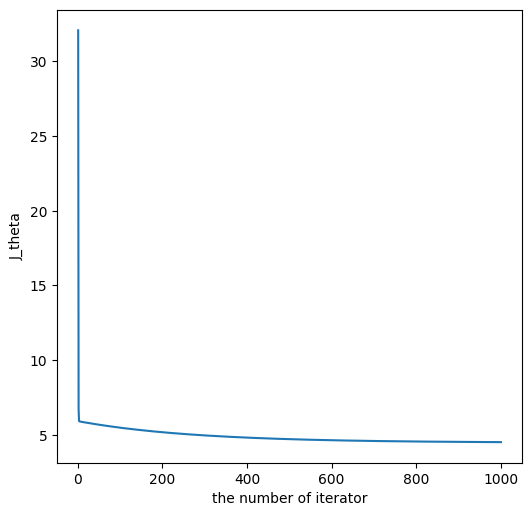

In [ ]:
# 假设函数 h(theta) = theta0 + theta1*x
m = len(x_data)
theta = np.zeros(2)
learning_rate = 0.01
iterator_num = 1000

def cost_J(theta):
  sum = 0.0
  for i in range(len(x_data)):
    x = np.array([1.0, x_data[i]])
    sum += (np.dot(theta, x.T) - y_data[i])**2
  return (1/(2*m)) * sum

def GradientDescent(theta):
  tmp = np.zeros(len(theta))
  for i in range(len(theta)):
    sum = 0.0
    for j in range(len(x_data)):
      x = np.array([1.0, x_data[j]])
      sum += (np.dot(theta, x.T) - y_data[j]) * x[i]
    tmp[i] = theta[i] - learning_rate * (1/m) * sum
  return tmp

def LinearRegression(theta, iterator_num):
  plt.figure(figsize=(6,6),dpi=100)#设置画布
  error = []
  for i in range(1, iterator_num + 1):
    error.append(cost_J(theta))
    print("i: %d, error: %f" % (i, error[i - 1]))
    if i != 1 and error[i - 1] - error[i - 2] >= 0 and error[i - 1] - error[i - 2] <= 1e-5:
      break
    theta = GradientDescent(theta)

  plt.plot(np.arange(1, len(error) + 1), error)
  plt.xlabel('the number of iterator')
  plt.ylabel('J_theta')
  plt.show()
  return theta
  
theta = LinearRegression(theta, iterator_num)

# plotHypothesisFunction

[-3.24140214  1.1272942 ]
[3.6464781619820266, 2.989942018487852, 6.361566248530307, 4.653264614170638, 3.364316423114252, 6.208592425260802, 5.186700230759653, 6.428640253574784, 4.070453511515266, 2.4566191313190777, 3.19623685753221, 12.725592938918378, 3.2225028124487864, 6.237338427422722, 3.1173262633622367, 2.8227642882677526, 3.9342763718619422, 2.5417298436024054, 4.006648659657831, 4.729469702254784, 3.7355344039738525, 19.608851338944874, 2.9475557564765524, 3.889973709706515, 3.03187736281818, 18.11518652072753, 11.219527884474324, 9.110360431731193, 11.611826266919334, 21.787911032238554, 2.679597924559373, 4.186790273205856, 7.184040098621912, 3.400389837591954, 6.014923281283641, 5.701873681269333, 5.885058989163914, 3.0785473427987076, 11.22854623809375, 3.9207488414328036, 2.8537648788345273, 4.517200203937556, 9.95695837775476, 3.267256392285185, 5.5793368014653915, 4.754608362968931, 2.4742049208769576, 3.2984824416924456, 9.947940024135333, 3.0056114079016036, 5.258

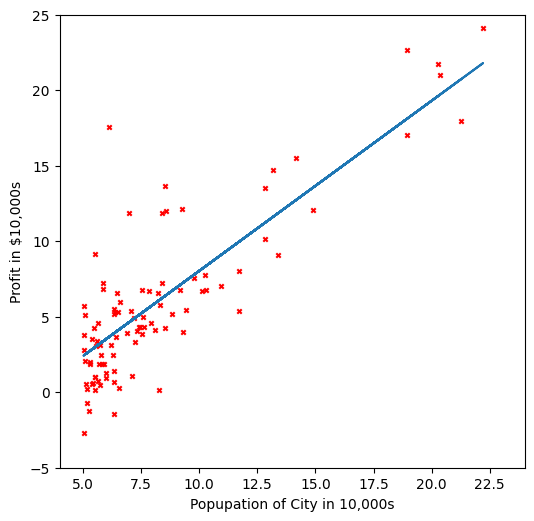

In [ ]:
print(theta)
y_predict = []
for i in range(len(x_data)):
  y_predict.append(theta[0] + theta[1] * x_data[i])
print(y_predict)

plt.figure(figsize=(6,6),dpi=100)#设置画布
plt.xlim((4, 24))#设定x轴范围
plt.ylim((-5, 25))#设定y轴范围
plt.scatter(x_data, y_data, s=10, c='red', marker='x')
plt.xlabel('Popupation of City in 10,000s')#设定x轴注释
plt.ylabel('Profit in $10,000s')#设定y轴注释
plt.plot(x_data, y_predict)
plt.show()